<a href="https://colab.research.google.com/github/mogesTesema/Machine-Learning-Mastery-With-TensorFlow/blob/main/05_transfer_learning_in_tensorflow_part_2_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with tensorflow part 2: Fine-Tuning

## Creating helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-21 09:11:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-10-21 09:11:01 (130 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import plot_loss_curves,create_tensorboard_callback,confusion_matrix,load_and_prep_image,walk_through_dir,unzip_data

## Let's get some data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-10-21 09:11:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.1MB/s    in 8.0s    

2025-10-21 09:11:13 (20.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data('10_food_classes_10_percent.zip')

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
# Create training and test directory paths
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"


In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE
                                                                            )
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[9.66116104e+01 5.62544670e+01 3.54017878e+00]
   [8.35452805e+01 4.71157494e+01 1.96109667e-01]
   [6.81339264e+01 4.12053566e+01 5.27678585e+00]
   ...
   [1.57857361e+01 8.78573608e+00 2.78573608e+00]
   [1.48300409e+01 6.83004045e+00 3.83004069e+00]
   [1.29284668e+01 4.92846680e+00 1.92846680e+00]]

  [[9.74285736e+01 5.72675400e+01 4.94547176e+00]
   [8.24087982e+01 4.68670273e+01 1.07142830e+00]
   [6.57155609e+01 3.87869873e+01 2.85841870e+00]
   ...
   [1.59033899e+01 8.90338993e+00 2.90338993e+00]
   [1.40322123e+01 6.03221273e+00 3.03221250e+00]
   [1.25754881e+01 4.57548857e+00 1.57548857e+00]]

  [[9.50098877e+01 5.67748718e+01 5.10172176e+00]
   [8.05908813e+01 4.64359016e+01 2.86988854e-01]
   [6.27181129e+01 3.72276764e+01 1.29910707e+00]
   ...
   [1.60000000e+01 9.00000000e+00 3.00000000e+00]
   [1.31502028e+01 5.15020323e+00 2.15020323e+00]
   [1.19587631e+01 3.95876312e+00 1.28564453e+00]]

  ...

  [[1.82579056e+02 1.86748734e+02 1.72330093e+02]
   [1

In [12]:
resNet_model = tf.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [13]:
resNet_weights = resNet_model.get_weights()




In [14]:
resNet_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
# resNet_model.fit(train_data_10_percent,epochs=3)

## Creating the model using functional API.
what is functional API actually

In [15]:
def getMe():
  def hello(name):
    return f"hello {name} functional API"
  return hello

result = getMe()("Keras")
print(result)

hello Keras functional API


## Modle 0: Building a transfer learning model using the Keras Functional API



In [16]:
# 1. Create the base model with tf.keras.applications.resNet50
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underling pre-trained patterns aren't updated durring training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If you using a model like ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the the most important information reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after global average 2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10. Fit the model and save its history
model_0_history = model_0.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data= test_data,
                              validation_steps= len(test_data),
                              callbacks=[create_tensorboard_callback("TensorFlow_Hub","Fine_tuned_EfficientNet")]
                              )




16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after global average 2D: (None, 1280)
Saving TensorBoard log files to: TensorFlow_Hub/Fine_tuned_EfficientNet/20251021-091129
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.2707 - loss: 2.1360 - val_accuracy: 0.7088 - val_loss: 1.3206
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.7369 - loss: 1.2063 - val_accuracy: 0.8120 - val_loss: 0.8824
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.8287 - loss: 0.8300 - val_accuracy: 0.8404 - val_loss: 0.7042
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.8254 - loss: 0.7101 - val_accuracy: 0.8528 - val_loss: 0.6148
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.8691 - loss: 0.5664 - val_accuracy: 0.8656 - val_loss: 0.5581


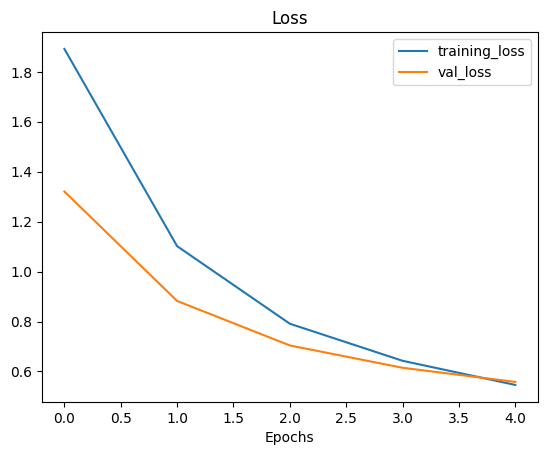

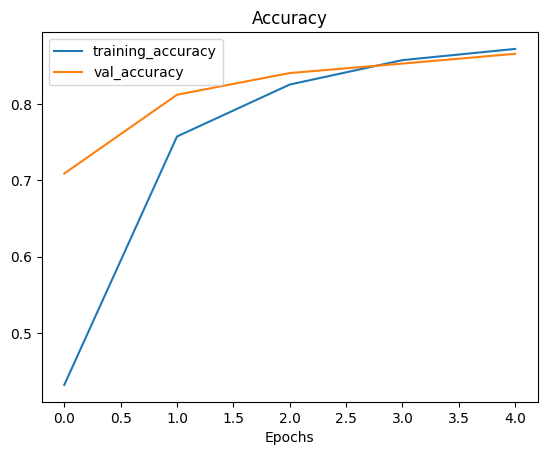

In [17]:
plot_loss_curves(model_0_history)

In [18]:
# Evaluate the tuned model
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8646 - loss: 0.5434


[0.5581455826759338, 0.8655999898910522]

In [19]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_layer_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activa

In [20]:
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          7 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, None,      │          0 │ normalization[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [21]:
# tf.keras.utils.plot_model(base_model)

In [22]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

## Getting a feature vector from a trained model

In [23]:
# # Define the input shape
# input_shape = (1,4,4,3)
# # Create a random tensor
# tf.random.set_seed(42)
# input_tensor = tf.random.normal(input_shape)
# # pass the random tensor through a global average pooling 2D layer
# global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D(input_tensor)
# global_average_pooled_tensor

## Running a series of transfer learning experiments
we've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the training data.. how about we set up a bunch of experiments to find out:
1. `model_1`  - use feature extracion transfer learning with 1% of the training data with data augmentation
2. `model_2` - use feature extracctio transfer learning with 10% of the training data with data augmentation
3. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmentation
4. `model_4` - use fine-turning transfer learning on 100% of the training data with data augmentation
**Note:** throught all experiments the same test dataset will be used to evaluate our model.. this ensures consisency across evaluation metrics.


In [24]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-10-21 09:13:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.9MB/s    in 6.9s    

2025-10-21 09:13:23 (18.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [25]:
unzip_data("10_food_classes_1_percent.zip")

In [26]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [27]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"


In [28]:
# Set up data loader
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                             image_size=IMG_SIZE,
                                                             label_mode="categorical",
                                                             batch_size=BATCH_SIZE,
                                                             )
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                  image_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  label_mode="categorical",
                                                  )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing


In [30]:
data_augmentation = tf.keras.Sequential([
    # tf.keras.layers.Rescaling(1/255.), # EfficientNet has rescaling built-in
    # tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.RandomErasing(factor=1,scale=(0.02,0.03)),
    tf.keras.layers.RandomZoom(height_factor=(0.1,0.15)),
    ],name="data_augmentation")

(519, 469, 3)


(np.float64(-0.5), np.float64(468.5), np.float64(518.5), np.float64(-0.5))

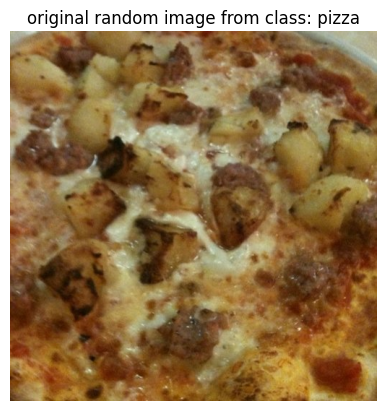

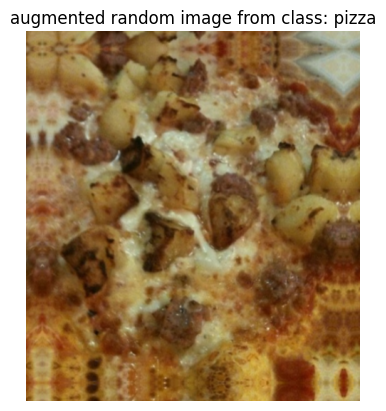

In [31]:
# view random image and compare with original image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = os.path.join(target_dir,random_image)
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original random image from class: {target_class}")
plt.axis(False)
plt.figure();
augmented_imag = data_augmentation(img)
print(augmented_imag.shape)
plt.imshow(augmented_imag/255.)
plt.title(f"augmented random image from class: {target_class}")
plt.axis(False)


## Model 1: feature extraction transfer learning with 1% of the data with data augmentation

In [32]:
#data augmentation with functional layers
# Recommended way for TF ≥ 2.17
inputs = tf.keras.Input(shape=(224, 224, 3), name="input_layer")

# Apply augmentation functionally (not in a Sequential)
x = tf.keras.layers.RandomFlip("horizontal")(inputs)
x = tf.keras.layers.RandomRotation(0.2)(x)
x = tf.keras.layers.RandomHeight(0.2)(x)
x = tf.keras.layers.RandomWidth(0.2)(x)
x = tf.keras.layers.RandomZoom(0.1, 0.15)(x)
# Setup input shape and base_model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False,input_shape=(224,224,3))
base_model.trainable = False

# Create the input layer
# inputs = layers.Input(shape=input_shape,name="input_layer")

# add in data augmentation Sequential model as a layer
# x = data_augmentation(inputs)

# Give base_model the inputs( after augmentation) and don't train it
x = base_model(x,training=False)

# pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# put a dense layer on as the output
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = keras.Model(inputs=inputs,outputs=outputs)

# compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# fit the model
model_1_history = model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=(int(0.25*len(test_data))),
                              callbacks=[create_tensorboard_callback("TensorFlow_Hub","1_percent_data_exprt")]
                              )










Saving TensorBoard log files to: TensorFlow_Hub/1_percent_data_exprt/20251021-091327
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.1339 - loss: 2.2435 - val_accuracy: 0.2204 - val_loss: 2.1281
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 777ms/step - accuracy: 0.2718 - loss: 2.0481 - val_accuracy: 0.3240 - val_loss: 2.0044
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 824ms/step - accuracy: 0.4623 - loss: 1.8430 - val_accuracy: 0.4293 - val_loss: 1.8989
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 766ms/step - accuracy: 0.6411 - loss: 1.6514 - val_accuracy: 0.4967 - val_loss: 1.7909
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 767ms/step - accuracy: 0.7321 - loss: 1.4954 - val_accuracy: 0.5395 - val_loss: 1.7184


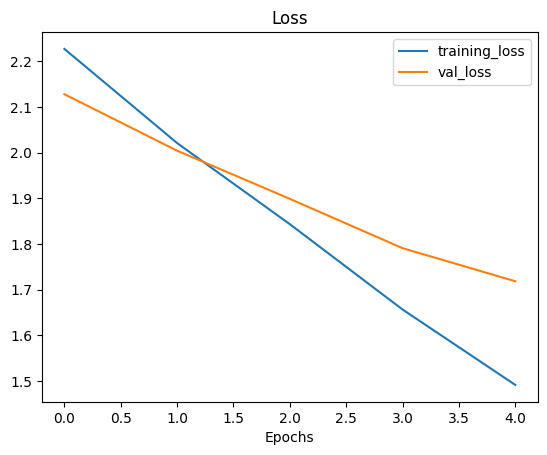

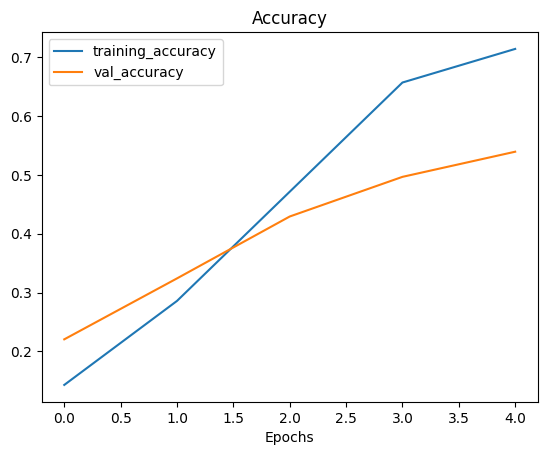

In [33]:
plot_loss_curves(model_1_history)

In [34]:
model_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_height_1 (RandomHeight)  │ (None, None, 224, 3)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_width_1 (RandomWidth)    │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

In [35]:
# Evaluate with test dataset
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.5475 - loss: 1.7087


[1.71565580368042, 0.5388000011444092]

## Model 2: feature extraction transfer learning model with 10% of data and data augmentation

In [36]:
# Get 10% of data
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"


In [37]:
# Set data inputs
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE
                                                                            )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [38]:
# Create model 2 with data augmentation built in
from tensorflow.keras import layers
inputs = layers.Input(shape=(224,224,3),name="input_layer")
x = layers.RandomFlip("horizontal")(inputs)
x = layers.RandomHeight(0.2)(x)
x = layers.RandomWidth(0.2)(x)
x = layers.RandomZoom(0.2)(x)
x = layers.RandomRotation(0.2)(x)

# setup the input shape to our model
input_shape = (224,224,3)
# create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)
outputs =  layers.Dense(10,activation="softmax",name="output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)

# compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
model_2_history = model_2.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)))



Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.1953 - loss: 2.2373 - val_accuracy: 0.6497 - val_loss: 1.4810
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.6307 - loss: 1.4404 - val_accuracy: 0.7993 - val_loss: 0.9906
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.7524 - loss: 1.0883 - val_accuracy: 0.8322 - val_loss: 0.7759
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.8049 - loss: 0.8907 - val_accuracy: 0.8207 - val_loss: 0.7109
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.7919 - loss: 0.7745 - val_accuracy: 0.8388 - val_loss: 0.6159


In [39]:
# set checkpoint path
checkpoint_path = "ten_percent_checkpoints_weights/ckpt/checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=False,
                                                        # monitors="val_accuracy",
                                                        mode="max",
                                                        save_freq="epoch",
                                                        verbose=1
                                                        )

In [40]:
# fit the model saving checkpoints every epoch
initial_epochs = 5
model_2_history = model_2.fit(train_data_10_percent,
                              epochs=initial_epochs,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)),
                              callbacks=[create_tensorboard_callback("TensorFlow_Hub","10_percent_data_aug"),checkpoint_callback]
                              )


Saving TensorBoard log files to: TensorFlow_Hub/10_percent_data_aug/20251021-091437
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8130 - loss: 0.7331
Epoch 1: saving model to ten_percent_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.8133 - loss: 0.7320 - val_accuracy: 0.8388 - val_loss: 0.5816
Epoch 2/5
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8254 - loss: 0.6530
Epoch 2: saving model to ten_percent_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.8259 - loss: 0.6521 - val_accuracy: 0.8454 - val_loss: 0.5522
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8688 - loss: 0.5685
Epoch 3: saving model to ten_percent_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.8681 - loss: 0.5698 - val_accuracy: 0.8438 - val_loss: 0.5356
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accur

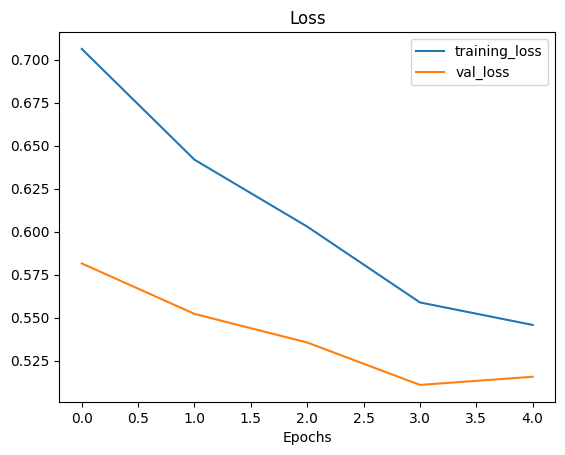

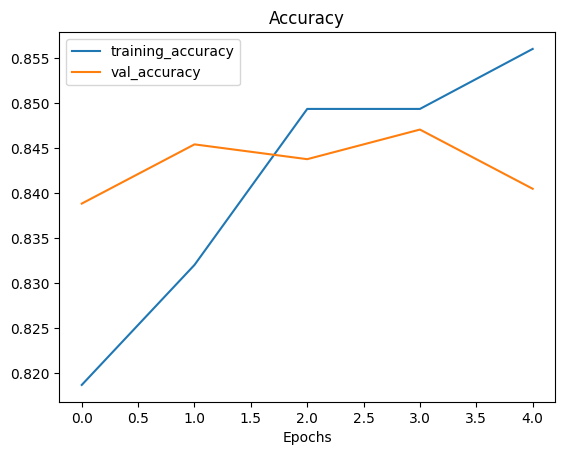

In [41]:
plot_loss_curves(model_2_history)

In [42]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8654 - loss: 0.5644


[0.5581455826759338, 0.8655999898910522]

In [43]:
results_10_percent = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8474 - loss: 0.5085


In [44]:
# Load in saved model and evaluate model
model_2.load_weights(checkpoint_path)


In [45]:
loaded_weights_model_result = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.8476 - loss: 0.5085


In [46]:
results_10_percent == loaded_weights_model_result

False

In [47]:
results_10_percent,loaded_weights_model_result

([0.4907900393009186, 0.857200026512146],
 [0.4907899796962738, 0.857200026512146])

In [48]:
import numpy as np
np.isclose(np.array(results_10_percent),np.array(loaded_weights_model_result))

array([ True,  True])

## Model 3: Fine-tuning an existing model on 10% of the data
**Note:** Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data

In [49]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <RandomFlip name=random_flip_2, built=True>,
 <RandomHeight name=random_height_2, built=True>,
 <RandomWidth name=random_width_2, built=True>,
 <RandomZoom name=random_zoom_2, built=True>,
 <RandomRotation name=random_rotation_2, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=Global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [50]:
for layer in model_2.layers:
  print(layer,layer.trainable)


<InputLayer name=input_layer, built=True> True
<RandomFlip name=random_flip_2, built=True> True
<RandomHeight name=random_height_2, built=True> True
<RandomWidth name=random_width_2, built=True> True
<RandomZoom name=random_zoom_2, built=True> True
<RandomRotation name=random_rotation_2, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=Global_average_pooling_layer, built=True> True
<Dense name=output_layer, built=True> True


In [51]:
for i, layer in enumerate(model_2.layers[6].layers):
  print(i,layer.name,layer.trainable)

0 input_layer_4 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [52]:
print(len(model_2.layers[6].trainable_variables))

0


In [53]:
# make the last 10 layers of the base model trainable true
for i in range(len(model_2.layers[6].layers)-10,len(model_2.layers[6].layers)):
  model_2.layers[6].layers[i].trainable = True

In [54]:
for i, layer in enumerate(model_2.layers[6].layers):
  print(i,layer.name,layer.trainable)

0 input_layer_4 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [57]:
# Recompile (  we have to recompile our models every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"])

In [58]:
# Check which layers are tunable
for layer in model_2.layers:
  print(layer,layer.trainable)
for layer_number, layer in enumerate(model_2.layers[6].layers):
  print(layer_number,layer.name,layer.trainable)

<InputLayer name=input_layer, built=True> True
<RandomFlip name=random_flip_2, built=True> True
<RandomHeight name=random_height_2, built=True> True
<RandomWidth name=random_width_2, built=True> True
<RandomZoom name=random_zoom_2, built=True> True
<RandomRotation name=random_rotation_2, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=Global_average_pooling_layer, built=True> True
<Dense name=output_layer, built=True> True
0 input_layer_4 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21